In [15]:
import src.utils as utils
import matplotlib.pyplot as plt

In [16]:
# Count the number of instances in the dataset
raw_data = "../data/raw"
print("Total of yes instances: ", utils.data_processing.count_instances(raw_data+'/yes'))
print("Total of no instances: ", utils.data_processing.count_instances(raw_data+'/no'))

Total of yes instances:  155
Total of no instances:  98


In [17]:
from src.data.make_dataset import make_renamed_dataset
make_renamed_dataset(raw_data+'/yes', "../data/interim/yes", "Y_")

'Success in making the Y_ renamed dataset.'

In [18]:
import src.data as data
data.make_renamed_dataset(raw_data+'/no',"../data/interim/no", "N_")

'Success in making the N_ renamed dataset.'

In [19]:
non_tumorous_files = utils.data_processing.count_instances("../data/interim/no")
yes_tumorous_files = utils.data_processing.count_instances("../data/interim/yes")
data = {"non_tumorous": non_tumorous_files, "yes_tumorous": yes_tumorous_files}

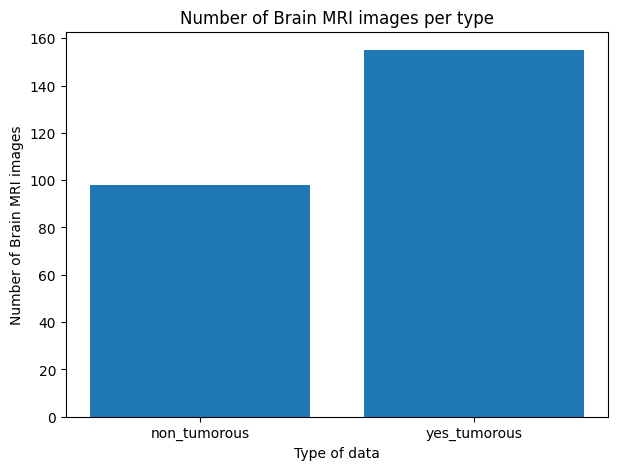

In [20]:
typex = [*data.keys()]
values = [*data.values()]

fig = plt.figure(figsize=(7, 5))
plt.bar(typex, values)
plt.xlabel("Type of data")
plt.ylabel("Number of Brain MRI images")
plt.title("Number of Brain MRI images per type")
plt.savefig("../data/external/number_images", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [21]:
#spliting the data into train(0.60), validation(0.20) and test(0.20)
import src.data as data
from types import SimpleNamespace

args = SimpleNamespace(input_filepath="../data/interim",
                       output_filepath="../data/interim/split",
                       train_ratio=0.6,
                       validation_ratio=0.2)
data.main(args.input_filepath, args.output_filepath, args.train_ratio, args.validation_ratio)


'Success in making the dataset.'

In [22]:
import time
start_time = time.time()

yes_tumorous_files = "../data/interim/split/train/yes"
non_tumorous_files = "../data/interim/split/train/no"
augmented_data_path = "../data/interim/split/train/augmented/"
utils.make_data_augmented_dataset(yes_tumorous_files, 6, augmented_data_path ,"yes")
utils.make_data_augmented_dataset(non_tumorous_files, 9, augmented_data_path ,"no")
end_time = time.time()
execution_time = (end_time - start_time)
print(f"Time elapsed: {utils.time_execution(execution_time)}")

Time elapsed: 0:1:42.4
